1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

In [2]:
import pandas as pd
PATH = "HomeWork-churn_rate_prediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [4]:
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [5]:
df.shape

(36992, 25)

## Data Analysis

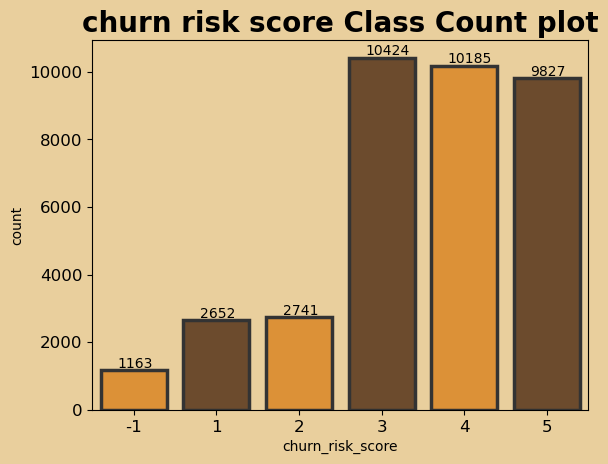

In [6]:
# Data analysis
# Todo: analyze your data here
plt.figure(facecolor='#E9CF9D')
ax = sns.countplot(data=df, x='churn_risk_score', edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+75)) for p in ax.patches]
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.title('churn risk score Class Count plot', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)
plt.show()

Text(0.5, 1.0, 'Count plot 2 feature of churn risk score with past complaint')

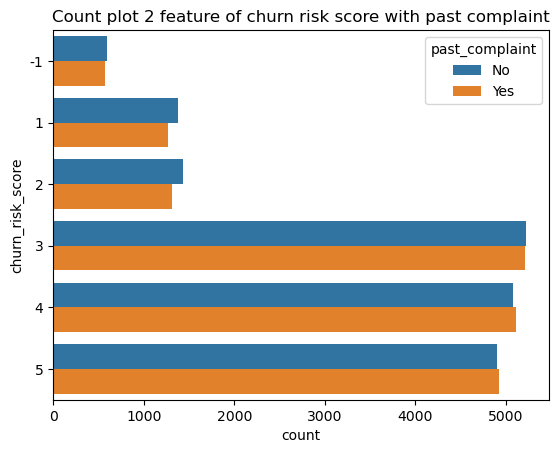

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
yr=sns.countplot(y="churn_risk_score", data=df, hue = 'past_complaint')
plt.title('Count plot 2 feature of churn risk score with past complaint')



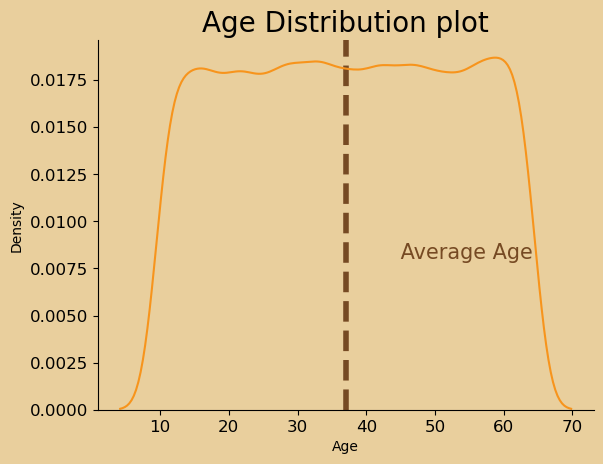

In [8]:
plt.figure(facecolor='#E9CF9D')
ax = sns.kdeplot(df['age'], color='lightgray')
ax.set_facecolor('#E9CF9D')
ax.lines[0].set_color('#F7941C')
plt.axvline(df['age'].mean(), linestyle='--', lw=4, zorder=1, color='#764A23')
plt.annotate(f' Average Age', (44, 0.008), fontsize=15,color='#764A23')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Age Distribution plot', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Age')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


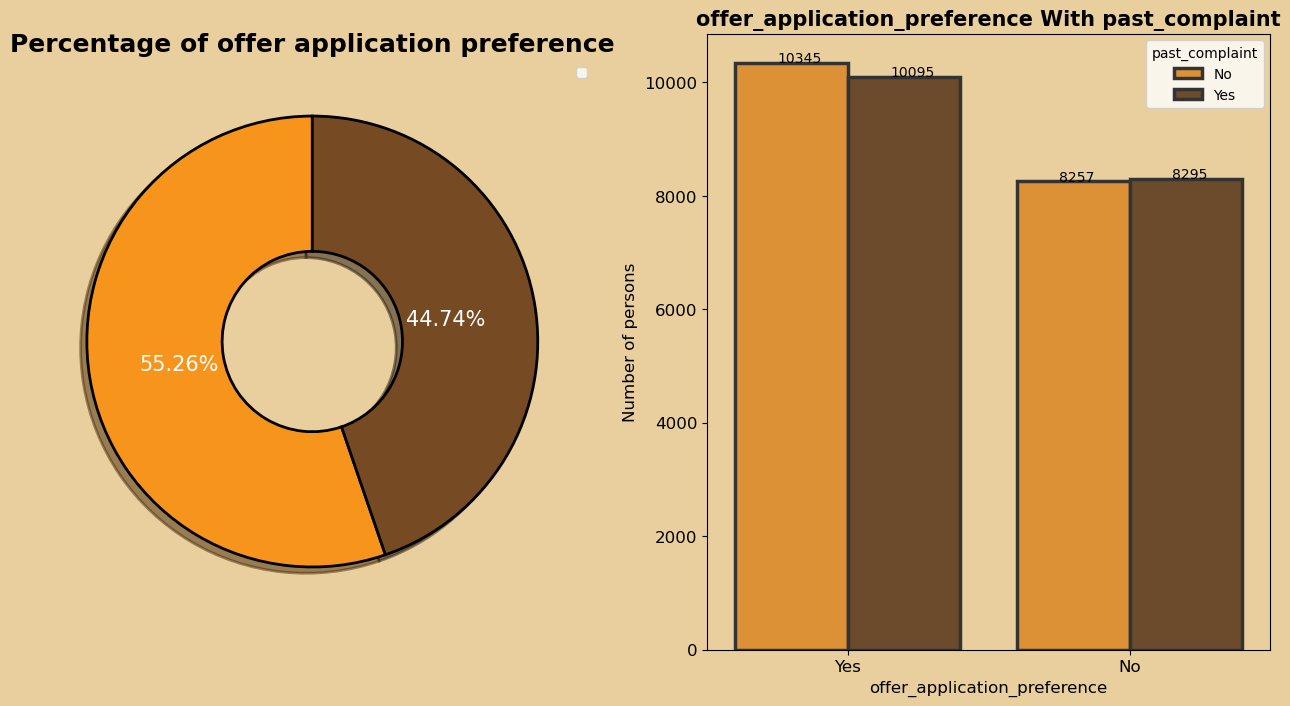

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(df["offer_application_preference"].value_counts(),autopct='%1.2f%%', radius =1, 
           colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percentage of offer application preference",fontsize=18,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].legend()
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1] = sns.countplot(x='offer_application_preference', data=df, hue =df['past_complaint'], edgecolor='0.2', lw=2.5,  
                       palette=["#F7941C", "#764A23"])
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10)) for p in axs[1].patches]
axs[1].set_title("offer_application_preference With past_complaint",fontsize=15,fontweight="bold")
axs[1].set_xlabel('offer_application_preference',fontsize=12)
axs[1].set_ylabel('Number of persons',fontsize=12)
axs[1].set_facecolor('#E9CF9D')
axs[1].tick_params(axis='both', which='major', labelsize=12)
plt.show()

## Preprocessing

def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df = df.replace('Error',np.NaN)
    # Thay đổi type của feature login_day thành kiểu số 
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype('float')
    # đổi các dòng dữ liệu ? thành NAN rồi loại bỏ chúng
    df = df.replace(-1,np.NaN)
    df = df.replace('?',np.NaN)
    df = df.replace('Unknown',np.NaN)
    # Todo: preprocess data
    for col in df.columns[0:-1]:
        if(df.dtypes[col]!='O'):
            df[col] = df[col].fillna(df[col].mean())

    df = df.dropna()
    return df

In [10]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df = df.replace('Error',np.NaN)
    df = df.replace(-1,np.NaN) 
    df = df.replace('?',np.NaN) 
    df = df.replace('Unknown',np.NaN)
    df = df.dropna()
    return df

In [11]:
df = preprocessing_data(df.copy())

In [12]:
df

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5.0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5.0
6,fffe43004900440031003100360037003900,Bridget Balog,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,...,55.380000,8982.50,28.0,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,3.0
10,fffe43004900440035003200390031003400,Mariana Hakes,25,F,OKZ6GDD,Village,Basic Membership,2016-05-22,Yes,CID19275,...,570.230000,35119.93,8.0,699.700000,Yes,Yes,No,Not Applicable,Poor Product Quality,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,fffe43004900440035003800320035003300,Hilary Ortego,51,M,LM92BDS,Town,Gold Membership,2016-10-07,No,xxxxxxxx,...,312.330000,63446.71,2.0,778.700000,No,Yes,No,Not Applicable,Products always in Stock,1.0
36985,fffe4300490044003800310034003500,Dwain Cann,12,F,GWAHGJY,Village,Premium Membership,2016-10-25,No,xxxxxxxx,...,418.380000,56397.21,7.0,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,2.0
36986,fffe43004900440034003900300036003500,Marlena Chastain,27,M,8X0LUUS,Town,Platinum Membership,2015-09-07,Yes,CID15800,...,135.830000,8225.68,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,3.0
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5.0


In [13]:
df.isna().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [14]:
df.shape

(18113, 25)

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# ChiSquare

In [15]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
# Tìm ra những feature quan trọng bằng phương pháp Chi bình phương,
# Nếu feature đó thuộc ngưỡng alpha chấp nhận được xem như là feature đó quan trọng, còn lại lại là không quan trọng sẽ loại bỏ

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, 
                                       index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

In [16]:

cT = ChiSquare(df)
testColumns = ['customer_id','Name','age', 'gender', 'security_no', 'region_category',
       'joining_date','referral_id','last_visit_time','membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint',
       'feedback']
for col in testColumns:
    cT.TestIndependence(colX=col,colY="churn_risk_score",alpha=0.05)


The column customer_id is NOT an important predictor. (Discard customer_id from model)
The column Name is NOT an important predictor. (Discard Name from model)
The column age is NOT an important predictor. (Discard age from model)
The column gender is NOT an important predictor. (Discard gender from model)
The column security_no is NOT an important predictor. (Discard security_no from model)
The column region_category is IMPORTANT for Prediction
The column joining_date is NOT an important predictor. (Discard joining_date from model)
The column referral_id is NOT an important predictor. (Discard referral_id from model)
The column last_visit_time is NOT an important predictor. (Discard last_visit_time from model)
The column membership_category is IMPORTANT for Prediction
The column joined_through_referral is IMPORTANT for Prediction
The column preferred_offer_types is IMPORTANT for Prediction
The column medium_of_operation is IMPORTANT for Prediction
The column internet_option is NOT an 

In [17]:
df = df.drop(columns=['customer_id','Name','age','gender','referral_id','security_no','joining_date','last_visit_time','internet_option','avg_transaction_value'])

In [18]:
df

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,14,516.160000,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
3,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,11,53.270000,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5.0
4,City,No Membership,No,Credit/Debit Card Offers,Smartphone,20,113.130000,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5.0
6,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Desktop,10,55.380000,28.0,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,3.0
10,Village,Basic Membership,Yes,Gift Vouchers/Coupons,Both,14,570.230000,8.0,699.700000,Yes,Yes,No,Not Applicable,Poor Product Quality,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,Town,Gold Membership,No,Without Offers,Desktop,24,312.330000,2.0,778.700000,No,Yes,No,Not Applicable,Products always in Stock,1.0
36985,Village,Premium Membership,No,Gift Vouchers/Coupons,Desktop,13,418.380000,7.0,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,2.0
36986,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,13,135.830000,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,3.0
36988,Town,Basic Membership,No,Without Offers,Smartphone,13,-638.123421,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5.0


## Feature Engineering

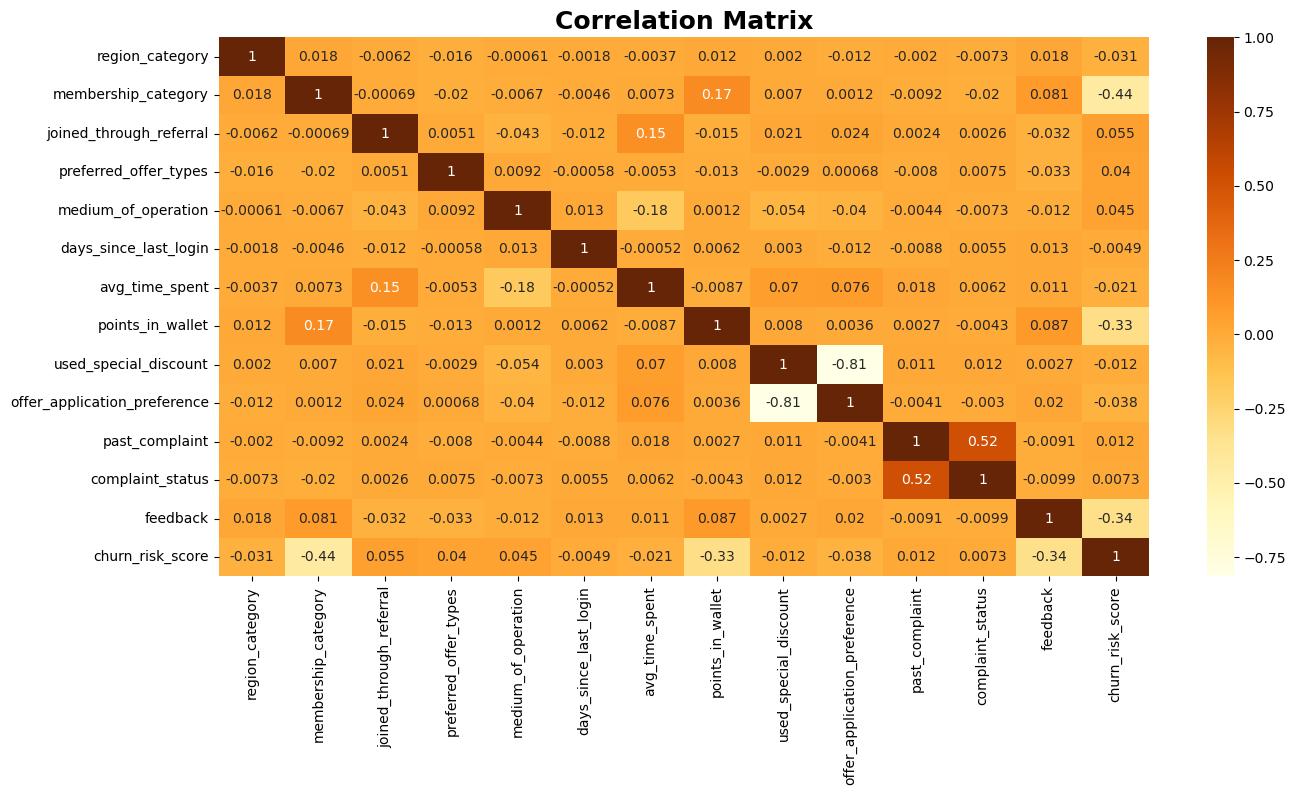

In [19]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df["region_category"] = ord_enc.fit_transform(df[["region_category"]])
    df["membership_category"] = ord_enc.fit_transform(df[["membership_category"]])
    df["joined_through_referral"] = ord_enc.fit_transform(df[["joined_through_referral"]])
    df["preferred_offer_types"] = ord_enc.fit_transform(df[["preferred_offer_types"]])
    df["medium_of_operation"] = ord_enc.fit_transform(df[["medium_of_operation"]])
    df["offer_application_preference"] = ord_enc.fit_transform(df[["offer_application_preference"]])
    df["used_special_discount"] = ord_enc.fit_transform(df[["used_special_discount"]])
    df["past_complaint"] = ord_enc.fit_transform(df[["past_complaint"]])
    df["complaint_status"] = ord_enc.fit_transform(df[["complaint_status"]])
    df["feedback"] = ord_enc.fit_transform(df[["feedback"]])
    
    # Todo: Normalize your data
    return df

df = apply_feature_engineering(df)
plt.figure(figsize=(15,7))
corrmat = df.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.show() # Show heatmap after normalized data

In [20]:
df['churn_risk_score'].value_counts()

3.0    5273
4.0    5148
5.0    4921
2.0    1410
1.0    1361
Name: churn_risk_score, dtype: int64

In [21]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('churn_risk_score', axis=1, inplace=False).values # Todo: Select features
    y = df['churn_risk_score'] # Todo: Select label
    y = np.array(y)
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [22]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 120
TRAIN_SIZE = 0.85

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [23]:
#pip install catboost

In [24]:

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()
# set the tolerance to a large value to make the example faster
pipe_dt = Pipeline(steps=[("scaler", scaler), ("Decision_Tree", DecisionTreeClassifier(random_state = 1))]) #Build a pipeline with a scaler and a model
pipe_fr = Pipeline(steps=[("scaler", scaler), ("Random_forest", RandomForestClassifier(bootstrap=True,random_state = 1 ))])
pipe_xgb = Pipeline(steps=[("scaler", scaler), ("GradientBoosting", GradientBoostingClassifier(random_state = 1))])
pipe_cb = Pipeline(steps=[("scaler", scaler), ("CatBoost", CatBoostClassifier(random_state = 1))])
# Parameters of pipelines can be set using '__' separated parameter names:

dt_params = {
    "scaler__feature_range": [(-1,1),(0,1)],
    "Decision_Tree__max_depth": list(range(6,10)),
    "Decision_Tree__max_features" : [2,3,4,"auto","sqrt","log2"],
    "Decision_Tree__min_samples_leaf": [2,3,4,5],
    "Decision_Tree__criterion": ["gini", "entropy"]
    }
rf_params = {
    "scaler__feature_range": [(-1,1),(0,1)],
    "Random_forest__n_estimators": [5,20,50,100],
    "Random_forest__max_features" : ['auto', 'sqrt'],
    "Random_forest__max_depth" : [4,5,6,8],
    "Random_forest__min_samples_split" : [2, 3, 4, 5, 6],
    "Random_forest__criterion": ["gini", "entropy"]
    }

xgb_params = {
    "scaler__feature_range": [(-1,1),(0,1)],
    "GradientBoosting__n_estimators": [5,20,50,100],
    "GradientBoosting__max_features" : ['auto', 'sqrt'],
    "GradientBoosting__max_depth" : [4,5,6,8],
    "GradientBoosting__min_samples_split" : [2, 3, 4, 5, 6],
    "GradientBoosting__criterion": ["friedman_mse", "squared_error"]
    }
cb_params = {
    "scaler__feature_range": [(-1,1),(0,1)],
    "CatBoost__iterations": [5,20,50,100],
    "CatBoost__learning_rate" : [0.1,0.2,0.5],
    "CatBoost__custom_loss" :['AUC', 'Accuracy']
    }

search_dt = GridSearchCV(pipe_dt, param_grid=dt_params , cv = 5, verbose=2, n_jobs = -1)
search_dt.fit(trainX, trainY)
print("Best parameter Decision tree : (CV score=%0.3f):" % search_dt.best_score_)
print(search_dt.best_params_)

search_fr = GridSearchCV(pipe_fr, param_grid=rf_params , cv = 5, verbose=2, n_jobs = -1)
search_fr.fit(trainX, trainY)
print("Best parameter Random forest : (CV score=%0.3f):" % search_fr.best_score_)
print(search_fr.best_params_)

search_xgb = GridSearchCV(pipe_xgb, param_grid=xgb_params , cv = 5, verbose=2, n_jobs = -1)
search_xgb.fit(trainX, trainY)
print("Best parameter Xgb : (CV score=%0.3f):" % search_xgb.best_score_)
print(search_xgb.best_params_)

search_cb = GridSearchCV(pipe_cb, param_grid=cb_params , cv = 5, verbose=2, n_jobs = -1)
search_cb.fit(trainX, trainY)
print("Best parameter cb : (CV score=%0.3f):" % search_cb.best_score_)
print(search_cb.best_params_)



Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameter Decision tree : (CV score=0.732):
{'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 8, 'Decision_Tree__max_features': 4, 'Decision_Tree__min_samples_leaf': 4, 'scaler__feature_range': (-1, 1)}
Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best parameter Random forest : (CV score=0.772):
{'Random_forest__criterion': 'entropy', 'Random_forest__max_depth': 8, 'Random_forest__max_features': 'auto', 'Random_forest__min_samples_split': 5, 'Random_forest__n_estimators': 100, 'scaler__feature_range': (0, 1)}
Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best parameter Xgb : (CV score=0.800):
{'GradientBoosting__criterion': 'friedman_mse', 'GradientBoosting__max_depth': 4, 'GradientBoosting__max_features': 'auto', 'GradientBoosting__min_samples_split': 2, 'GradientBoosting__n_estimators': 50, 'scaler__feature_range': (-1, 1)}
Fitting 5 folds for each of 48 candidates

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Decision tree


In [25]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(MinMaxScaler(feature_range = (-1, 1)),DecisionTreeClassifier(
        criterion = 'gini', max_features = 4, max_depth = 8,min_samples_leaf = 4))
    # Todo: fit your model with X, y
    model.fit(X,y)
    # Todo: fit your model with X, y

    return model

def calculate_performance(y_true, y_pred):
    """
    
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    y_pred = np.round(y_pred)
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='macro'))
    print("Recall: ", recall_score(y_true ,y_pred, average='macro'))
    print("F1: ", f1_score(y_true , y_pred, average='macro'))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("classification_report: \n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true , y_pred, average='macro')
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

mean absolute error of linear model on train set  0.30995063652896854
mean absolute error of linear model on test set  0.35590725064409273


In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(testX)  
calculate_performance(testY, y_pred)

Accuracy:  0.6993006993006993
Precision:  0.6813565258594414
Recall:  0.6783739303579551
F1:  0.6700920472618808
Confusion matrix: 
 [[152  20   7   2   7]
 [ 67  93  19   2  17]
 [ 19  30 679  71  19]
 [  6   6  92 583  93]
 [  4   2  10 324 393]]
classification_report: 
               precision    recall  f1-score   support

         1.0       0.61      0.81      0.70       188
         2.0       0.62      0.47      0.53       198
         3.0       0.84      0.83      0.84       818
         4.0       0.59      0.75      0.66       780
         5.0       0.74      0.54      0.62       733

    accuracy                           0.70      2717
   macro avg       0.68      0.68      0.67      2717
weighted avg       0.71      0.70      0.70      2717



0.6700920472618808

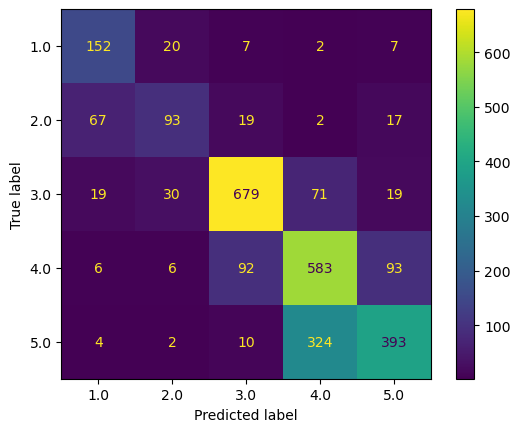

In [28]:
conf_matrix = confusion_matrix(y_true=testY, y_pred=pred)

vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Random forest

In [29]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(MinMaxScaler(feature_range = (0, 1)),RandomForestClassifier(n_estimators = 100,
        criterion = 'entropy', max_features = 'auto', max_depth = 8,min_samples_split = 5))
    # Todo: fit your model with X, y
    model.fit(X,y)
    # Todo: fit your model with X, y

    return model

def calculate_performance(y_true, y_pred):
    """
    
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    y_pred = np.round(y_pred)
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='macro'))
    print("Recall: ", recall_score(y_true ,y_pred, average='macro'))
    print("F1: ", f1_score(y_true , y_pred, average='macro'))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("classification_report: \n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true , y_pred, average='macro')
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

mean absolute error of linear model on train set  0.17582488958170953
mean absolute error of linear model on test set  0.23702613176297388


In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(testX)  
calculate_performance(testY, y_pred)


Accuracy:  0.7802723592197276
Precision:  0.7800407214477463
Recall:  0.7720965659642391
F1:  0.7721458293343926
Confusion matrix: 
 [[157  22   5   0   4]
 [ 53 135   9   0   1]
 [  2   1 779  21  15]
 [  3   0 100 485 192]
 [  1   0   2 166 564]]
classification_report: 
               precision    recall  f1-score   support

         1.0       0.73      0.84      0.78       188
         2.0       0.85      0.68      0.76       198
         3.0       0.87      0.95      0.91       818
         4.0       0.72      0.62      0.67       780
         5.0       0.73      0.77      0.75       733

    accuracy                           0.78      2717
   macro avg       0.78      0.77      0.77      2717
weighted avg       0.78      0.78      0.78      2717



0.7721458293343926

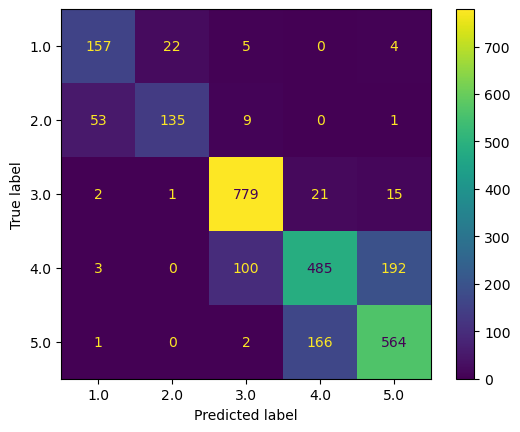

In [31]:
conf_matrix = confusion_matrix(y_true=testY, y_pred=pred)

vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## XGBoost

In [32]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(MinMaxScaler(feature_range = (-1, 1)),GradientBoostingClassifier(n_estimators = 50,
        criterion = 'friedman_mse', max_features = 'auto', max_depth = 4,min_samples_split = 2))
    # Todo: fit your model with X, y
    model.fit(X,y)
    # Todo: fit your model with X, y

    return model

def calculate_performance(y_true, y_pred):
    """
    
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    y_pred = np.round(y_pred)
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='macro'))
    print("Recall: ", recall_score(y_true ,y_pred, average='macro'))
    print("F1: ", f1_score(y_true , y_pred, average='macro'))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("classification_report: \n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true , y_pred, average='macro')
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

mean absolute error of linear model on train set  0.1652377240841777
mean absolute error of linear model on test set  0.20426941479573058


In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(testX)  
calculate_performance(testY, y_pred)


Accuracy:  0.7957305852042694
Precision:  0.8007384309942658
Recall:  0.7922086027554835
F1:  0.7855065834331141
Confusion matrix: 
 [[172  16   0   0   0]
 [ 69 129   0   0   0]
 [  0   0 756  62   0]
 [  0   0  51 451 278]
 [  0   0   0  79 654]]
classification_report: 
               precision    recall  f1-score   support

         1.0       0.71      0.91      0.80       188
         2.0       0.89      0.65      0.75       198
         3.0       0.94      0.92      0.93       818
         4.0       0.76      0.58      0.66       780
         5.0       0.70      0.89      0.79       733

    accuracy                           0.80      2717
   macro avg       0.80      0.79      0.79      2717
weighted avg       0.80      0.80      0.79      2717



0.7855065834331141

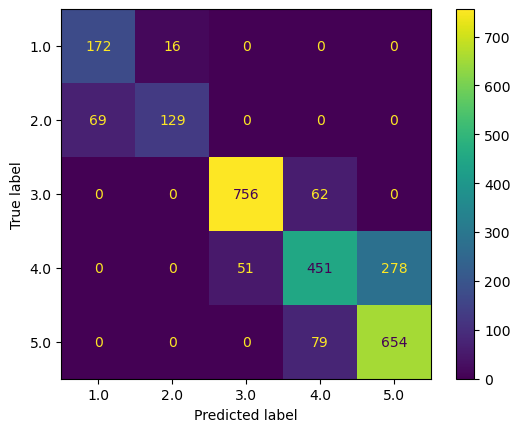

In [34]:
conf_matrix = confusion_matrix(y_true=testY, y_pred=pred)

vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Catboost

In [35]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(MinMaxScaler(feature_range = (-1, 1)),CatBoostClassifier(iterations = 50,
        custom_loss = 'AUC', learning_rate = 0.2))
    # Todo: fit your model with X, y
    model.fit(X,y)
    # Todo: fit your model with X, y

    return model

def calculate_performance(y_true, y_pred):
    """
    
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    y_pred = np.round(y_pred)
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='macro'))
    print("Recall: ", recall_score(y_true ,y_pred, average='macro'))
    print("F1: ", f1_score(y_true , y_pred, average='macro'))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("classification_report: \n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true , y_pred, average='macro')
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

0:	learn: 1.2438504	total: 171ms	remaining: 8.37s
1:	learn: 1.0674780	total: 178ms	remaining: 4.27s
2:	learn: 0.9351674	total: 186ms	remaining: 2.91s
3:	learn: 0.8303578	total: 194ms	remaining: 2.23s
4:	learn: 0.7502365	total: 202ms	remaining: 1.81s
5:	learn: 0.6916543	total: 209ms	remaining: 1.53s
6:	learn: 0.6372530	total: 217ms	remaining: 1.33s
7:	learn: 0.5979768	total: 225ms	remaining: 1.18s
8:	learn: 0.5664809	total: 232ms	remaining: 1.05s
9:	learn: 0.5385632	total: 240ms	remaining: 959ms
10:	learn: 0.5108100	total: 246ms	remaining: 873ms
11:	learn: 0.4956018	total: 254ms	remaining: 805ms
12:	learn: 0.4769472	total: 261ms	remaining: 742ms
13:	learn: 0.4625142	total: 268ms	remaining: 689ms
14:	learn: 0.4515647	total: 274ms	remaining: 640ms
15:	learn: 0.4383582	total: 281ms	remaining: 597ms
16:	learn: 0.4307444	total: 288ms	remaining: 559ms
17:	learn: 0.4186045	total: 295ms	remaining: 525ms
18:	learn: 0.4130116	total: 302ms	remaining: 493ms
19:	learn: 0.4090579	total: 309ms	remaini

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(testX)  
calculate_performance(testY, y_pred)


Accuracy:  0.7953625322046375
Precision:  0.7905740924561795
Recall:  0.7844858136081496
F1:  0.7772014326974347
Confusion matrix: 
 [[162  26   0   0   0]
 [ 69 129   0   0   0]
 [  0   0 745  73   0]
 [  0   0  58 442 280]
 [  0   0   0  50 683]]
classification_report: 
               precision    recall  f1-score   support

         1.0       0.70      0.86      0.77       188
         2.0       0.83      0.65      0.73       198
         3.0       0.93      0.91      0.92       818
         4.0       0.78      0.57      0.66       780
         5.0       0.71      0.93      0.81       733

    accuracy                           0.80      2717
   macro avg       0.79      0.78      0.78      2717
weighted avg       0.80      0.80      0.79      2717



0.7772014326974347

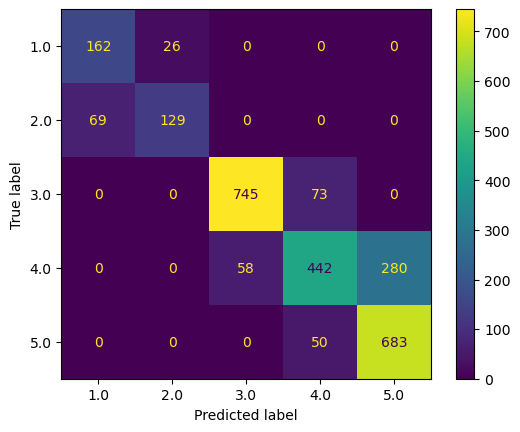

In [37]:
conf_matrix = confusion_matrix(y_true=testY, y_pred=pred)

vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

In [38]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. F1-score, lý do vì chỉ có Precision hay chỉ có Recall thì không đánh giá được chất lượng mô hình.Chỉ dùng Precision, mô hình chỉ đưa ra dự đoán cho một điểm mà nó chắc chắn nhất. Khi đó Precision = 1, tuy nhiên ta không thể nói là mô hình này tốt.Chỉ dùng Recall, nếu mô hình dự đoán tất cả các điểm đều là positive. Khi đó Recall = 1, tuy nhiên ta cũng không thể nói đây là mô hình tốt. Khi đó F1-score được sử dụng. F1-score là trung bình điều hòa (harmonic mean) của precision và recall (giả sử hai đại lượng này khác 0)." \
           "Other conclusion: em dùng MinMaxScale: để làm tỉ lệ của các số quá lớn trở nên nhỏ lại. Đối với main model của em thì em sẽ lấy model GradientBoostingClassifier bởi vì các thông số như dự đoán, f1, recall đều cao hơn so với 3 thuật toán kia. Và parameter em chọn là n_estimators = 50, criterion = 'friedman_mse', max_features = 'auto', max_depth = 4,min_samples_split = 2. Parameter này có được là nhờ vào gridsearchCV dã tuning"

In [39]:
get_conclusion()

"7. F1-score, lý do vì chỉ có Precision hay chỉ có Recall thì không đánh giá được chất lượng mô hình.Chỉ dùng Precision, mô hình chỉ đưa ra dự đoán cho một điểm mà nó chắc chắn nhất. Khi đó Precision = 1, tuy nhiên ta không thể nói là mô hình này tốt.Chỉ dùng Recall, nếu mô hình dự đoán tất cả các điểm đều là positive. Khi đó Recall = 1, tuy nhiên ta cũng không thể nói đây là mô hình tốt. Khi đó F1-score được sử dụng. F1-score là trung bình điều hòa (harmonic mean) của precision và recall (giả sử hai đại lượng này khác 0).Other conclusion: em dùng MinMaxScale: để làm tỉ lệ của các số quá lớn trở nên nhỏ lại. Đối với main model của em thì em sẽ lấy model GradientBoostingClassifier bởi vì các thông số như dự đoán, f1, recall đều cao hơn so với 3 thuật toán kia. Và parameter em chọn là n_estimators = 50, criterion = 'friedman_mse', max_features = 'auto', max_depth = 4,min_samples_split = 2. Parameter này có được là nhờ vào gridsearchCV dã tuning"